# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path) 

# Combine the data into a single DataFrame
combined_study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_study_data.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_of_mice = combined_study_data ['Mouse ID'].nunique()
print("Number of unique mice:", number_of_mice)

Number of unique mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_data[combined_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()


print("Duplicate mice by Mouse ID and Timepoint:")
print(duplicate_mice_ids)

Duplicate mice by Mouse ID and Timepoint:
['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_ids = combined_study_data.loc[combined_study_data["Mouse ID"] == 'g989', :]
# Display all the data for the duplicate Mouse IDs
print("Data for duplicate mouse IDs:")
duplicate_mouse_ids



Data for duplicate mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_study_data[combined_study_data['Mouse ID'].isin(duplicate_mice_ids)==False]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_study_data["Mouse ID"].nunique()



248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped = combined_study_data.groupby('Drug Regimen')
summary_statistics = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
summary_statistics['SEM'] = grouped['Tumor Volume (mm3)'].agg(sem)

# Calculate mean, median, variance, standard deviation, and SEM for each group

means = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Standard_deviation = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev', 'Tumor Volume SEM']

#Display Summary 
summary_statistics
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])


# Display the summary DataFrame
summary_statistics


,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

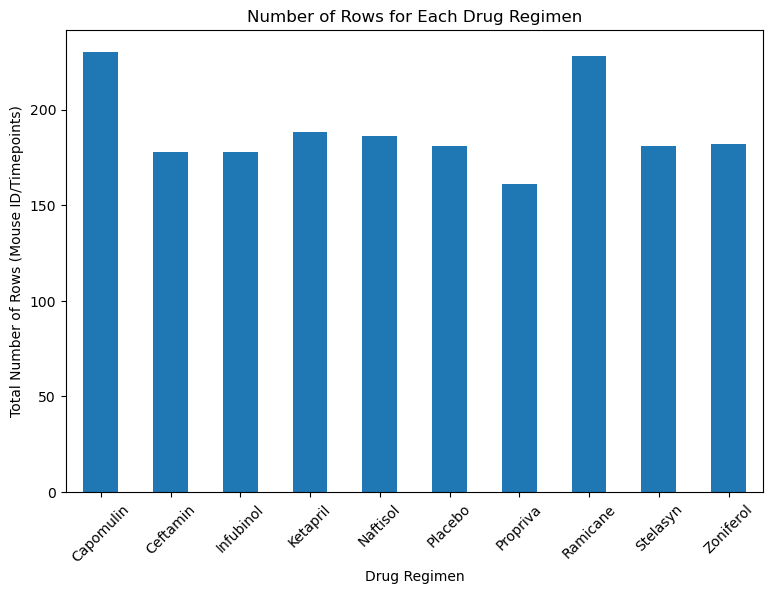

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = combined_study_data['Mouse ID'].groupby(combined_study_data['Drug Regimen']).count()
regimen_counts.plot(kind='bar', figsize=(9, 6))
plt.xticks(rotation=45)

plt.hist('Mouse ID')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Number of Rows for Each Drug Regimen')
plt.show()

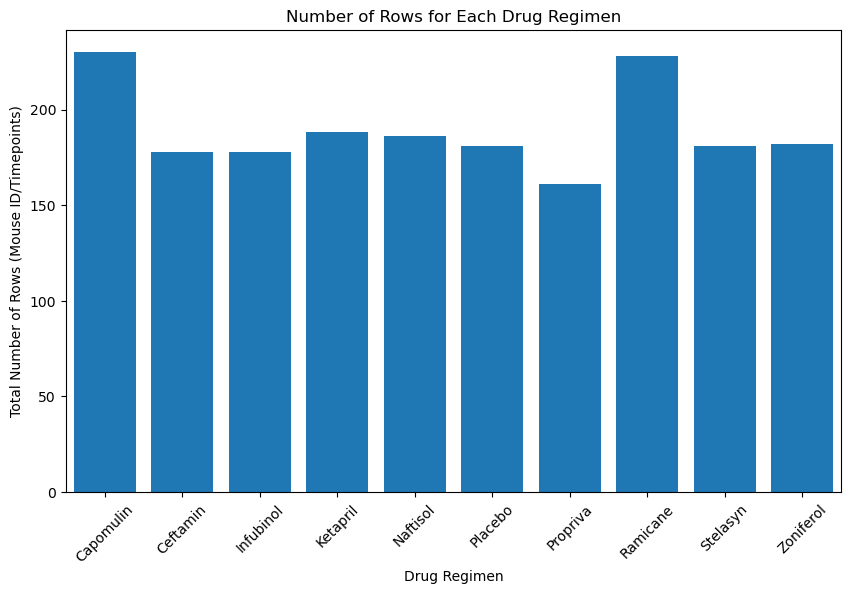

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = combined_study_data['Mouse ID'].groupby(combined_study_data['Drug Regimen']).count()

regimen_names = regimen_counts.index
counts = regimen_counts.values


regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.bar(regimen_names, counts)

plt.xticks(rotation=45)

plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Number of Rows for Each Drug Regimen')
plt.show()

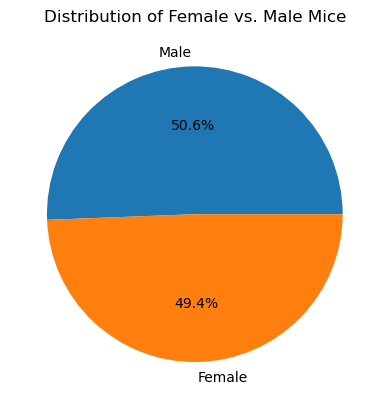

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = combined_study_data.Sex.value_counts()
plt.pie(gender_distribution.values,labels=gender_distribution.index.values,autopct='%1.1f%%' )

plt.title('Distribution of Female vs. Male Mice')
plt.show()

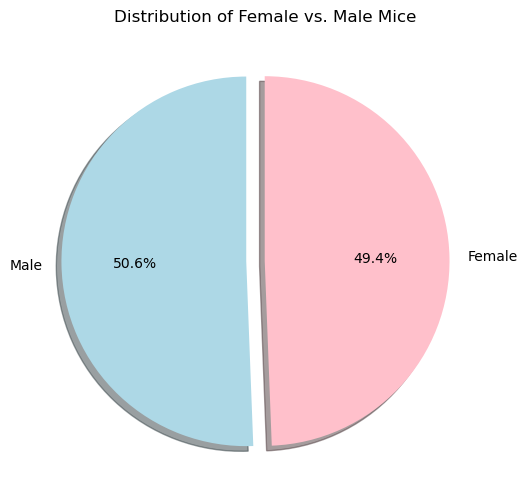

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = combined_study_data['Sex'].value_counts()

plt.figure(figsize=(6,6))
colors=['lightblue', 'pink']
explode=(0.1, 0)

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, explode=explode)

plt.title('Distribution of Female vs. Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#filtered_df = combined_study_data[combined_study_data['Drug Regimen'].isin(treatment_regimens)]

max_timepoints = clean_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

final_tumor_volume_df = pd.merge(max_timepoints, clean_study_data, on=['Mouse ID', 'Timepoint'], how='left')


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume_df = pd.merge(max_timepoints, clean_study_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [58]:
capomulin = 'Capomulin'
ramicane = 'Ramicane'
infubinol = 'Infubinol'
ceftamin = 'Ceftamin'




In [59]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []


#treatment_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(capomulin, ramicane,infubinol, ceftamin)]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatment_regimens: 
    final_tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    potential_outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # add subset 
    
    #tumor_volume_data.append(treatment_df['Tumor Volume (mm3)'])
    
   # Determine outliers using upper and lower bounds
    print(f"{drug}'s potential outliers: { potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
